In [1]:
import sympy as sym
from IPython.display import Math, Latex
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = 20, 8
plt.rcParams['legend.fontsize'] = 'xx-large'
plt.rcParams['axes.titlesize'] = 20

i_a = sym.Symbol('i_a')
i_b = sym.Symbol('i_b')
i_c = sym.Symbol('i_c')
theta = sym.Symbol('theta')

def get_matrix_latex(M):
    to_print = r"""
    \begin{{bmatrix}}
    {}
    \end{{bmatrix}}
    """.format(sym.printing.latex(M, mat_delim = ''))
    return to_print

i_abc = sym.Matrix([[i_a],[i_b],[i_c]])

# I. Instantaneous Currents

## Graph

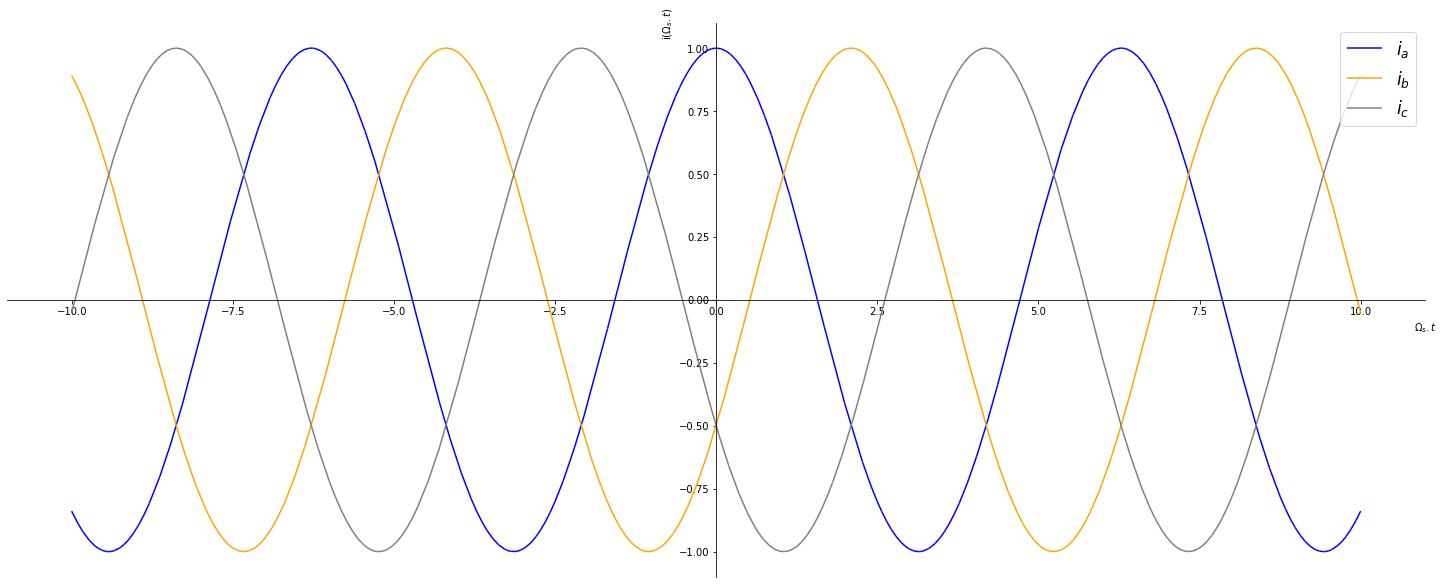

In [2]:
p_ia = sym.cos(theta)
p_ib = sym.cos(theta-2*sym.pi/3)
p_ic = sym.cos(theta-4*sym.pi/3)
p1 = sym.plot(p_ia, line_color = 'blue', show = False, label = '$i_a$')
p2 = sym.plot(p_ib, line_color = 'orange', show = False, label = '$i_b$')
p3 = sym.plot(p_ic, line_color = 'grey', show = False, label = '$i_c$')
p1.append(p2[0])
p1.append(p3[0])
p1.legend = True
p1.xlabel = r'$\Omega_s.t$'
p1.ylabel = r'i($\Omega_s.t$)'
p1.show()

 # II. Clarke $\alpha\beta\gamma$-Currents

## Clarke Matrix $K_C$

In [3]:
K_C = sym.Rational(2,3)*sym.Matrix([[1, -sym.Rational(1,2), -sym.Rational(1,2)],[0, sym.sqrt(3)/2, -sym.sqrt(3)/2], [1/sym.sqrt(2), 1/sym.sqrt(2), 1/sym.sqrt(2)]]);

to_print = r"""
\begin{{equation*}}
K_C = {}
\end{{equation*}}
""".format(get_matrix_latex(K_C))
Latex(to_print)

<IPython.core.display.Latex object>

$
\begin{equation*}
    \begin{bmatrix}
        i_{\alpha} \\
        i_{\beta} \\
        i_{\gamma}
    \end{bmatrix} =
    K_C*
    \begin{bmatrix}
        i_a \\
        i_b \\
        i_c
    \end{bmatrix}
\end{equation*}
$

## Graph

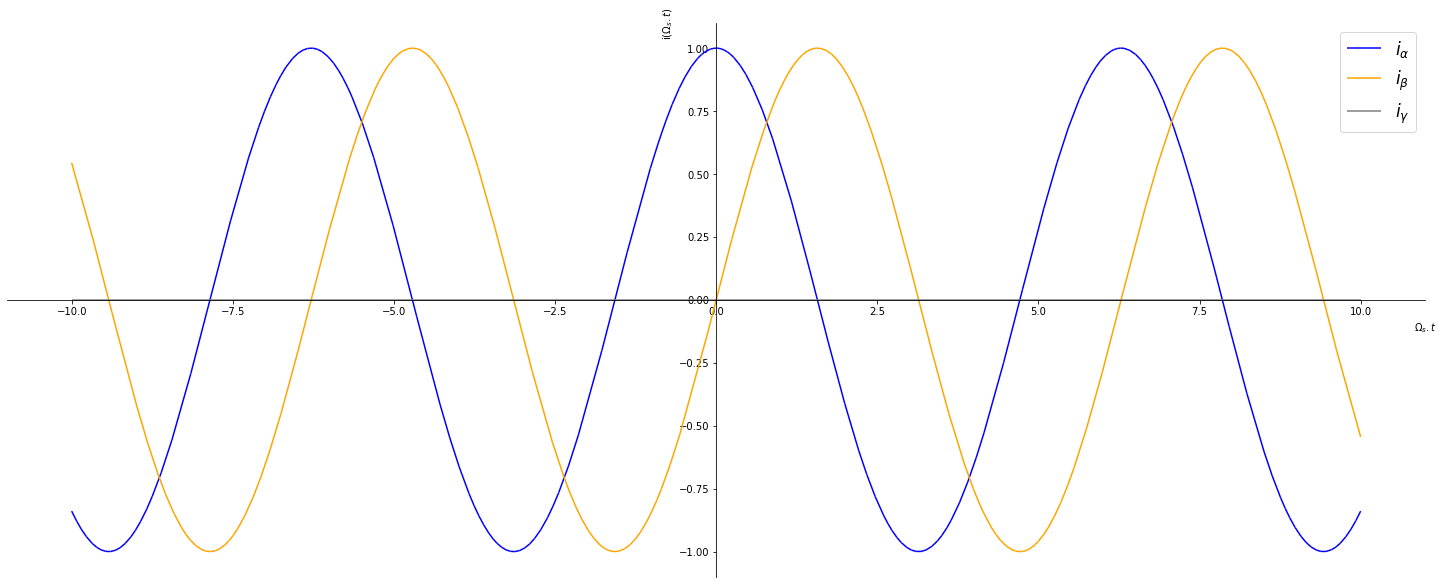

In [4]:
p_iabg = sym.simplify(K_C*sym.Matrix([[p_ia],[p_ib],[p_ic]]))

p1 = sym.plot(p_iabg[0], line_color = 'blue', show = False, label = r"$i_{\alpha}$")
p2 = sym.plot(p_iabg[1], line_color = 'orange', show = False, label = r"$i_{\beta}$")
p3 = sym.plot(p_iabg[2], line_color = 'grey', show = False, label = r"$i_{\gamma}$")
p1.append(p2[0])
p1.append(p3[0])
p1.legend = True
p1.xlabel = r'$\Omega_s.t$'
p1.ylabel = r'i($\Omega_s.t$)'
p1.show()

# III. $dq\gamma$-Currents

## Park Matrix $K_P$

In [5]:
K_P = sym.Matrix([[sym.cos(theta), sym.sin(theta), 0],[-sym.sin(theta), sym.cos(theta), 0], [0, 0, 1]]);

to_print = r"""
\begin{{equation*}}
K_P = {}
\end{{equation*}}
""".format(get_matrix_latex(K_P))
Latex(to_print)

<IPython.core.display.Latex object>

$
\begin{equation*}
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix} =
    K_P
    \begin{bmatrix}
        i_{\alpha} \\
        i_{\beta} \\
        i_{\gamma} 
    \end{bmatrix}
    \hspace{1cm}
    \implies
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix} =
    K_P*K_C*
    \begin{bmatrix}
        i_a \\
        i_b \\
        i_c
    \end{bmatrix}
\end{equation*}
$

## Graph

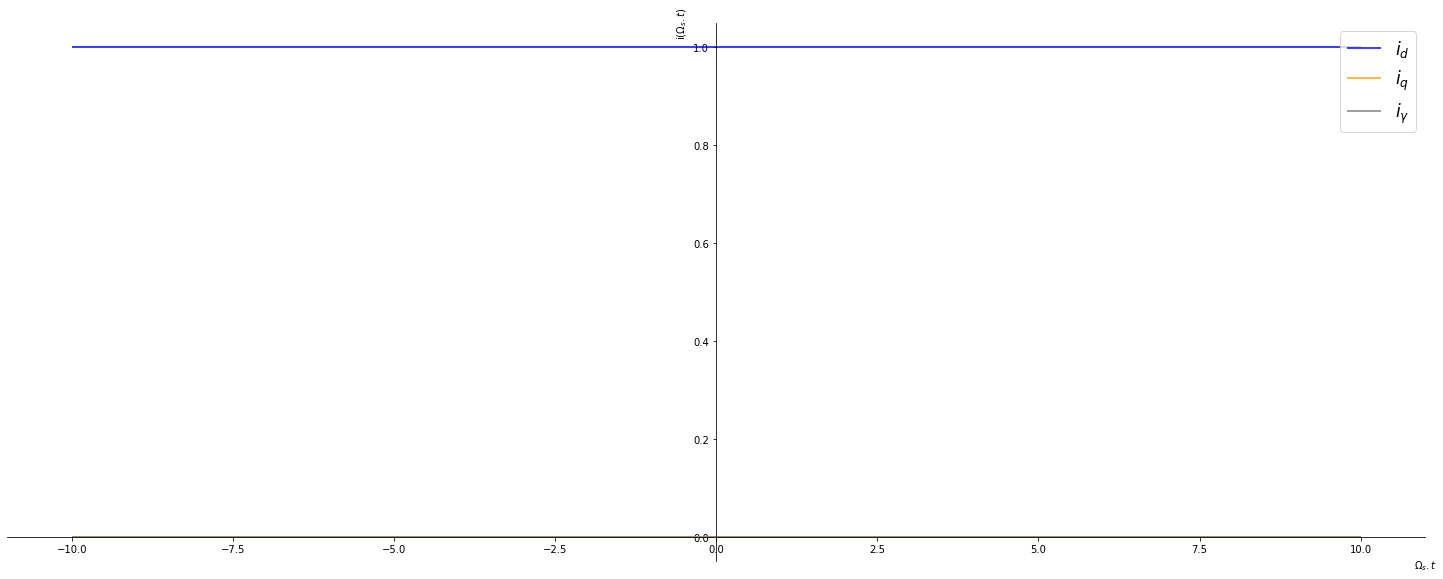

In [6]:
p_idqg = sym.simplify(K_P*p_iabg)

p1 = sym.plot(p_idqg[0], line_color = 'blue', show = False, label = r"$i_d$")
p2 = sym.plot(p_idqg[1], line_color = 'orange', show = False, label = r"$i_q$")
p3 = sym.plot(p_idqg[2], line_color = 'grey', show = False, label = r"$i_{\gamma}$")
p1.append(p2[0])
p1.append(p3[0])
p1.legend = True
p1.xlabel = r'$\Omega_s.t$'
p1.ylabel = r'i($\Omega_s.t$)'
p1.show()

## Calculation

### Park-Clarke Matrix and Inverse

In [7]:
K_PC = K_P*K_C
K_PC_inv = K_PC.transpose()

i_d = sym.Symbol('i_d')
i_q = sym.Symbol('i_q')
i_g = sym.Symbol('i_{\gamma}')
sym_i_dqg = sym.Matrix([[i_d],[i_q],[i_g]])

to_print = r"""
\begin{{equation*}}
K_{{PC}} = 
{}
\end{{equation*}}
\begin{{equation*}}
K^{{-1}}_{{PC}} = K^{{T}}_{{PC}} = 
{}
\end{{equation*}}
""".format(
    get_matrix_latex(sym.simplify(K_PC)),
    get_matrix_latex(sym.simplify(K_PC_inv)),
)
Latex(to_print)

<IPython.core.display.Latex object>

### $dq\gamma$ vs. instantaneous

In [8]:
i_dqg = K_PC*i_abc

to_print = r"""
\begin{{equation*}}
    \begin{{bmatrix}}
        i_d \\
        i_q \\
        i_{{\gamma}} 
    \end{{bmatrix}} = 
    {}
\end{{equation*}}
\begin{{equation*}}
    \begin{{bmatrix}}
        i_a \\
        i_b \\
        i_c 
    \end{{bmatrix}} = 
    {}
\end{{equation*}}
""".format(
    get_matrix_latex(sym.simplify(i_dqg)),
    get_matrix_latex(sym.simplify(K_PC_inv*sym_i_dqg)),
)
Latex(to_print)

<IPython.core.display.Latex object>

# IV. Partial derivatives

## Calculation

In [9]:
di_dqg_da = sym.simplify(sym.diff(i_dqg, i_a))
di_dqg_db = sym.simplify(sym.diff(i_dqg, i_b))
di_dqg_dc = sym.simplify(sym.diff(i_dqg, i_c))
di_dqg_dth = sym.simplify(sym.diff(i_dqg, theta))

to_print = r"""
\begin{{equation*}}
    \frac{{\partial}}{{\partial i_a}}
    \begin{{bmatrix}}
        i_d \\
        i_q \\
        i_{{\gamma}} 
    \end{{bmatrix}} = 
    {}
    \hspace{{1cm}}
    \frac{{\partial}}{{\partial i_b}}
    \begin{{bmatrix}}
        i_d \\
        i_q \\
        i_{{\gamma}} 
    \end{{bmatrix}} =
    {}
    \hspace{{1cm}}
    \frac{{\partial}}{{\partial i_c}}
    \begin{{bmatrix}}
        i_d \\
        i_q \\
        i_{{\gamma}} 
    \end{{bmatrix}} =
    {}
    \hspace{{1cm}}
    \frac{{\partial}}{{\partial \theta}}
    \begin{{bmatrix}}
        i_d \\
        i_q \\
        i_{{\gamma}} 
    \end{{bmatrix}} =
    {}
\end{{equation*}}
""".format(
    get_matrix_latex(di_dqg_da),
    get_matrix_latex(di_dqg_db),
    get_matrix_latex(di_dqg_dc),
    get_matrix_latex(di_dqg_dth),
)
Latex(to_print)

<IPython.core.display.Latex object>

# V. Uncertainty Propagation

The measurement uncertainties for the **current** sensors and **position angle** are (should be) known.  
- Uncertainties in **current** measurements: $u(i_a) \hspace{.2cm} u(i_b) \hspace{.2cm} u(i_c)$
- Uncertainty in **position angle** measurement: $u(\theta)$

## Combined uncertainty $u_c$ of $dq\gamma$-Currents
The definition of combined uncertainty is taken from [GUM](https://www.bipm.org/utils/common/documents/jcgm/JCGM_100_2008_E.pdf) 5.1.2

$$
\begin{equation*}
    \begin{bmatrix}
        u^2_c(i_d) \\
        u^2_c(i_q) \\
        u^2_c(i_{\gamma}) 
    \end{bmatrix} =   
    \left( \frac{\partial}{\partial i_a}
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix}.u(i_a) \right)^2+
    \left( \frac{\partial}{\partial i_b}
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix}.u(i_b) \right)^2+
    \left( \frac{\partial}{\partial i_c}
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix}.u(i_c) \right)^2+
    \left( \frac{\partial}{\partial \theta}
    \begin{bmatrix}
        i_d \\
        i_q \\
        i_{\gamma} 
    \end{bmatrix}.u(\theta) \right)^2
\end{equation*}
$$

## Calculation

In [10]:
u_i_a = sym.Symbol(r'u(i_{a})')
u_i_b = sym.Symbol(r'u(i_{b})')
u_i_c = sym.Symbol(r'u(i_{c})')
u_theta = sym.Symbol(r'u(\theta)')

# common function for each term of the sum
def get_sum_term(partial_d, u):
    partial_d_u = partial_d.multiply_elementwise(sym.Matrix(3*[u]))
    partial_d_u_2 = partial_d_u.multiply_elementwise(partial_d_u)
    return partial_d_u_2

# the terms of the sum
di_dqg_da_u_i_a_2 = get_sum_term(di_dqg_da, u_i_a)
di_dqg_db_u_i_b_2 = get_sum_term(di_dqg_db, u_i_b)
di_dqg_dc_u_i_c_2 = get_sum_term(di_dqg_dc, u_i_c)
di_dqg_dth_u_theta_2 = get_sum_term(di_dqg_dth, u_theta)

# sum the terms!
u_i_dqg_2 = di_dqg_da_u_i_a_2 + di_dqg_db_u_i_b_2 + di_dqg_dc_u_i_c_2 + di_dqg_dth_u_theta_2

# square root (probably inefficient: it is the best I could find for element-wise square root operation)
u_i_dqg = sym.simplify(u_i_dqg_2.applyfunc(lambda i: sym.sqrt(i)))

to_print = r"""
\begin{{equation*}}
    \begin{{bmatrix}}
        u_c(i_d) \\
        u_c(i_q) \\
        u_c(i_{{\gamma}})
    \end{{bmatrix}} =
    {}
\end{{equation*}}
""".format(
    get_matrix_latex(u_i_dqg),
)
Latex(to_print)

<IPython.core.display.Latex object>

In [11]:
# transform symbolic math to function

i_d_f = sym.lambdify([i_a, i_b, i_c, theta], i_dqg[0])
i_q_f = sym.lambdify([i_a, i_b, i_c, theta], i_dqg[1])
i_g_f = sym.lambdify([i_a, i_b, i_c, theta], i_dqg[2])
i_dqg_f = sym.lambdify([i_a, i_b, i_c, theta], i_dqg)

u_i_d_f = sym.lambdify([i_a, i_b, i_c, theta, u_i_a, u_i_b, u_i_c, u_theta], u_i_dqg[0])
u_i_q_f = sym.lambdify([i_a, i_b, i_c, theta, u_i_a, u_i_b, u_i_c, u_theta], u_i_dqg[1])
u_i_g_f = sym.lambdify([i_a, i_b, i_c, theta, u_i_a, u_i_b, u_i_c, u_theta], u_i_dqg[2])
u_i_dqg_f = sym.lambdify([i_a, i_b, i_c, theta, u_i_a, u_i_b, u_i_c, u_theta], u_i_dqg)

## Example 1

### Parameters

In [12]:
ex_ia = -426.4
ex_ib = -152.3
ex_ic = 578.7
ex_theta = 0.21

to_print = r"""
\begin{{align}}
    i_a &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    i_b &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    i_c &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    \theta &= {:.3f} \hspace{{.1cm}} \mathrm{{rad}} \\
\end{{align}}
""".format(
    ex_ia,
    ex_ib,
    ex_ic,
    ex_theta,
)
Latex(to_print)

<IPython.core.display.Latex object>

In [13]:
ex_Uia = 5
ex_Uib = 5
ex_Uic = 5
ex_Utheta = 2*np.pi/360

k = 2.4
ex_uia = ex_Uia/k
ex_uib = ex_Uia/k
ex_uic = ex_Uia/k
ex_utheta = ex_Utheta/k

to_print = r"""
\begin{{align}}
    U(i_a) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U(i_b) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U(i_c) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U(\theta) &= {:.3f} \hspace{{.1cm}} \mathrm{{rad}} \\
    \\
    k & = {} \\
    \\
    u(i_a) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u(i_b) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u(i_c) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u(\theta) &= {:.3f} \hspace{{.1cm}} \mathrm{{rad}} \\
\end{{align}}
""".format(
    ex_Uia,
    ex_Uib,
    ex_Uic,
    ex_Utheta,
    "{} \hspace{{.1cm}} (triangle \hspace{{.1cm}} distribution)".format(k),
    ex_uia,
    ex_uib,
    ex_uic,
    ex_utheta,
)
Latex(to_print)

<IPython.core.display.Latex object>

### Calculation

In [14]:
ex_i_dqg = i_dqg_f(
    ex_ia,
    ex_ib,
    ex_ic,
    ex_theta,
)

to_print = r"""
\begin{{align}}
    i_d &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    i_q &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    i_{{\gamma}} &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
\end{{align}}
""".format(
    ex_i_dqg[0][0],
    ex_i_dqg[1][0],
    ex_i_dqg[2][0],
)
Latex(to_print)

<IPython.core.display.Latex object>

In [15]:
ex_u_i_dqg = u_i_dqg_f(
    ex_ia,
    ex_ib,
    ex_ic,
    ex_theta,
    ex_uia,
    ex_uib,
    ex_uic,
    ex_utheta,
)
k = 2.5
ex_U_i_dqg = k*ex_u_i_dqg

to_print = r"""
\begin{{align}}
    u_c(i_d) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u_c(i_q) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u_c(i_{{\gamma}}) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    \\
    k &= {} \\
    \\
    U_c(i_d) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U_c(i_q) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U_c(i_{{\gamma}}) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
\end{{align}}
""".format(
    ex_u_i_dqg[0][0],
    ex_u_i_dqg[1][0],
    ex_u_i_dqg[2][0],
    "{} \hspace{{.1cm}} (coverage \hspace{{.1cm}} factor)".format(k),
    ex_U_i_dqg[0][0],
    ex_U_i_dqg[1][0],
    ex_U_i_dqg[2][0],
)
Latex(to_print)

<IPython.core.display.Latex object>

## Example 2

In [16]:
k = 2.5
U_i = 10
U_theta = 2*np.pi/360
u_i = U_i/k
u_theta = U_theta/k

to_print = r"""
\begin{{align}}
    U(i_{{abc}}) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    U(\theta) &= {:.3f} \hspace{{.1cm}} \mathrm{{rad}} \\
    \\
    k & = {} \\
    \\
    u(i_{{abc}}) &= {:.1f} \hspace{{.1cm}} \mathrm{{A}} \\
    u(\theta) &= {:.3f} \hspace{{.1cm}} \mathrm{{rad}} \\
\end{{align}}
""".format(
    U_i,
    U_theta,
    k,
    u_i,
    u_theta,
)
Latex(to_print)

<IPython.core.display.Latex object>

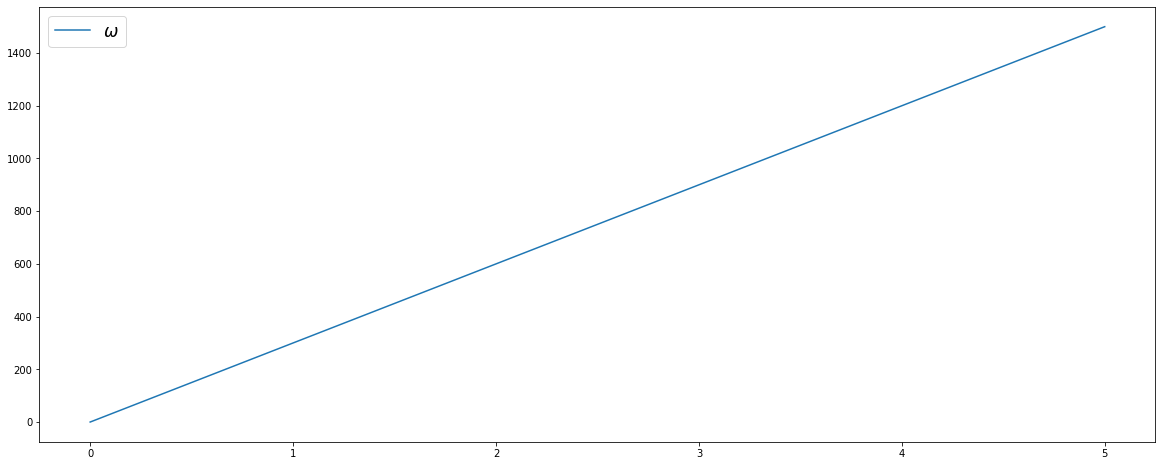

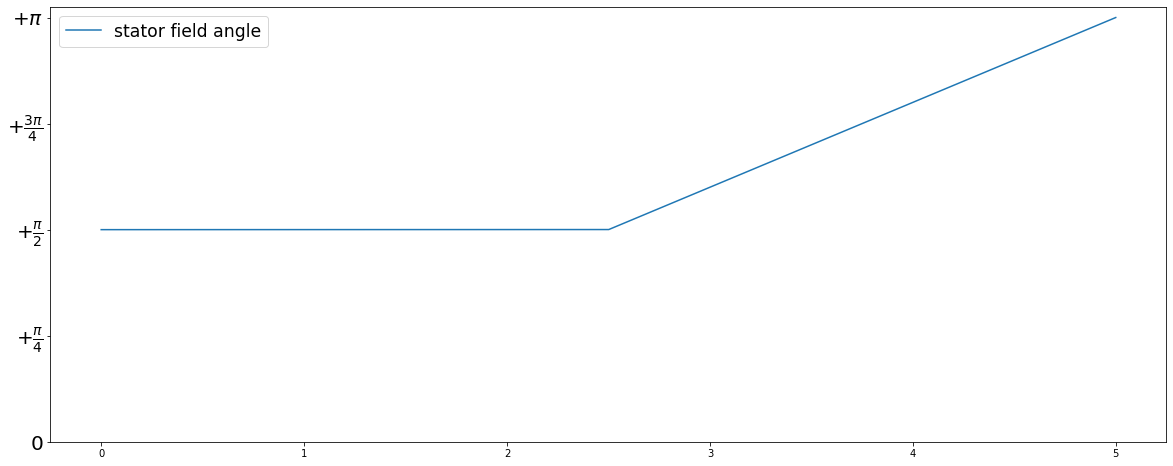

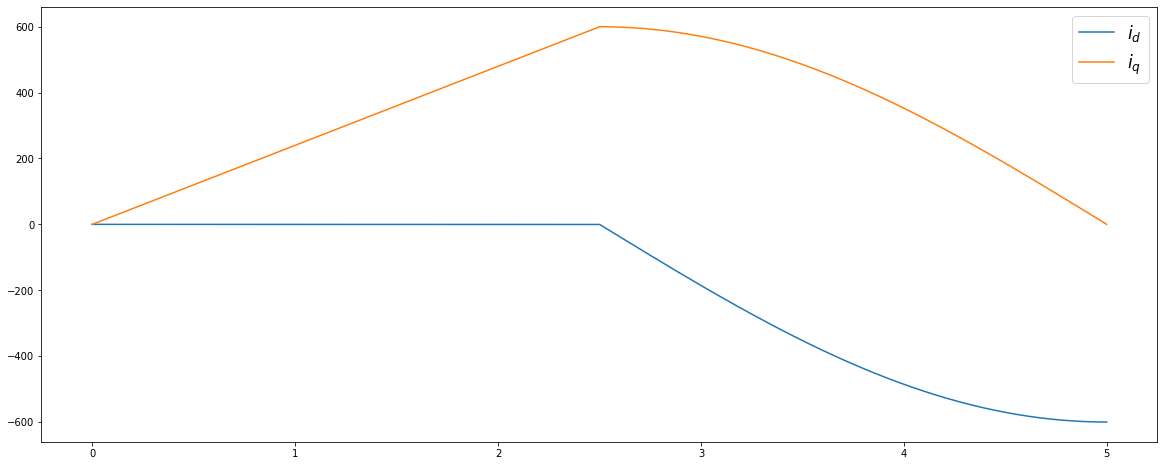

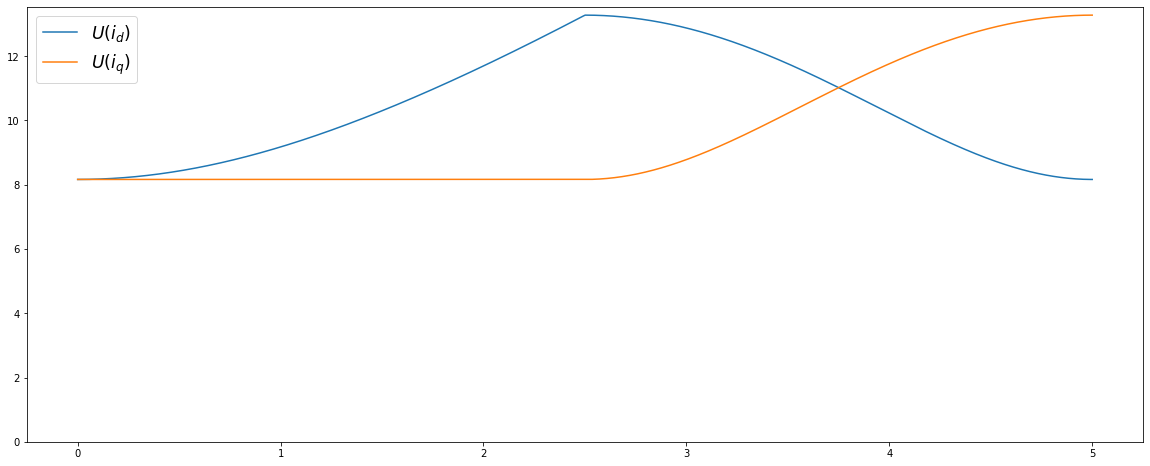

In [19]:
N = 20000
tmax = 5
t = np.linspace(0, tmax, N)
w = 1500*t/tmax # rad/s
Ipk_ = 600
Ipk = np.concatenate([np.arange(0, Ipk_, Ipk_/(N//2)), Ipk_*np.ones(N//2)])
stator_field_angle = np.concatenate([np.pi/2*np.ones(N//2), np.arange(np.pi/2, np.pi, np.pi/2/(N//2))])
n_ia = Ipk*np.cos(w*t + stator_field_angle)
n_ib = Ipk*np.cos(w*t - 2*np.pi/3 + stator_field_angle)
n_ic = Ipk*np.cos(w*t - 4*np.pi/3 + stator_field_angle)
n_theta = w*t 

n_id = i_d_f(n_ia, n_ib, n_ic, n_theta)
n_iq = i_q_f(n_ia, n_ib, n_ic, n_theta)

n_uid = k*u_i_d_f(n_ia, n_ib, n_ic, n_theta, u_i, u_i, u_i, u_theta)
n_uiq = k*u_i_q_f(n_ia, n_ib, n_ic, n_theta, u_i, u_i, u_i, u_theta)

# -------------------------------------------
# PLOT 
# -------------------------------------------

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, w, label = r"$\omega$")
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
y_pi   = stator_field_angle/np.pi
unit   = 0.25
y_tick = np.arange(0, 1+unit, unit)
y_label = [r"$0$", r"$+\frac{\pi}{4}$", r"$+\frac{\pi}{2}$", r"$+\frac{3\pi}{4}$", r"$+\pi$",]
ax.plot(t, stator_field_angle, label = r"stator field angle")
ax.set_yticks(y_tick*np.pi)
ax.set_yticklabels(y_label, fontsize=20)
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, n_id, label = r"$i_d$")
ax.plot(t, n_iq, label = r"$i_q$")
ax.legend()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, n_uid, label = r"$U(i_d)$")
ax.plot(t, n_uiq, label = r"$U(i_q)$")
ax.set_ylim(bottom = 0)
ax.legend()